In [36]:

# Importing tensorflow 
import tensorflow as tf
#  importing keras from tensorflow
from tensorflow import keras

# import numpy 
import numpy as np

# importing matplotlib
import matplotlib.pyplot as plt


In [37]:
# Loading the mnist dataset using keras
mnist = tf.keras.datasets.mnist

In [38]:
# dividing the dataset loaded into train & test
(images_train,label_train),(images_test,labels_test) = mnist.load_data()

In [39]:
# specifying the class as to that of number
class_names= ["one","two","three","four","five","six","seven","eight","nine"]

In [40]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

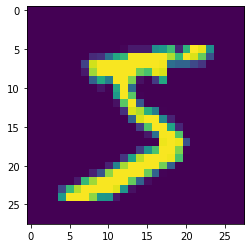

In [41]:
# displaying the first image in train data using matplotlib
plt.imshow(images_train[0])

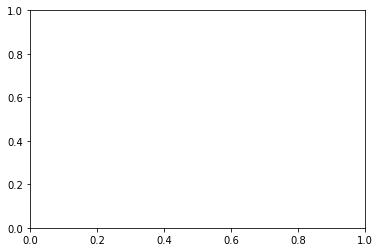

In [42]:

plt.grid(False)

Text(0.5, 0, 'Classification label: 5')

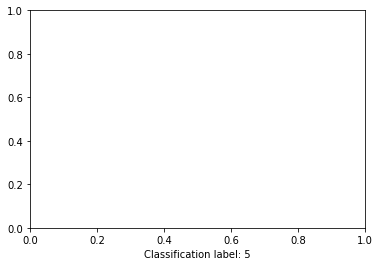

In [43]:
plt.xlabel("Classification label: {}".format(label_train[0]))

In [44]:
plt.show()

In [45]:
# dividing the train data by 255 as images have a range between 0- 255
images_train = images_train/255.0

In [46]:
# dividing the test data by 255 as images have a range between 0- 255
images_test = images_test/255.0

In [32]:
# Creating a model
model= tf.keras.models.Sequential([
                                  #  flattenign the input layer bby specifying the size
                 tf.keras.layers.Flatten(input_shape=(28,28)),
                #  -------------HIDDEN LAYERS--------------------
                 tf.keras.layers.Dense(512,activation=tf.nn.relu),
                #  using dropout in order to reduce overfitting
                 tf.keras.layers.Dropout(0.2),
                 tf.keras.layers.Dense(512,activation=tf.nn.relu),
                 #  using dropout in order to reduce overfitting
                 tf.keras.layers.Dropout(0.2),
                 tf.keras.layers.Dense(10,activation=tf.nn.softmax),
                 

])

# compiling the model by using optimizer as 'adam' , loss as sparse_categorical_crsossentropy & giving metrics as accuracy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fitting the model by specifying the number of epochs
model.fit(images_train,label_train,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3586 - accuracy: 0.8899
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1082 - accuracy: 0.9663
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0809 - accuracy: 0.9750
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0637 - accuracy: 0.9799
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0557 - accuracy: 0.9830
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0493 - accuracy: 0.9837
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0420 - accuracy: 0.9871
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0384 - accuracy: 0.9871
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0355 - accuracy: 0.9885
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

In [47]:
# evaluating the model on unseen data & getting the accuracy & loss on it
test_loss,test_acc = model.evaluate(images_test,labels_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.9832


In [48]:
# printing the accuracy score
print(test_acc)

0.9832000136375427


In [35]:
#saving the model in tflite format in order to deploy it on android app
keras_file = "digits.h5"
tf.keras.models.save_model(model,keras_file)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpe6d5ggtp/assets


INFO:tensorflow:Assets written to: /tmp/tmpe6d5ggtp/assets
